<a href="https://www.kaggle.com/code/jimschacko/reservation-prediction-using-xgboost-with-hytuning?scriptVersionId=118229056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [3]:
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
dataset.shape

(36275, 19)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
dataset.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [7]:
dataset.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

<AxesSubplot:>

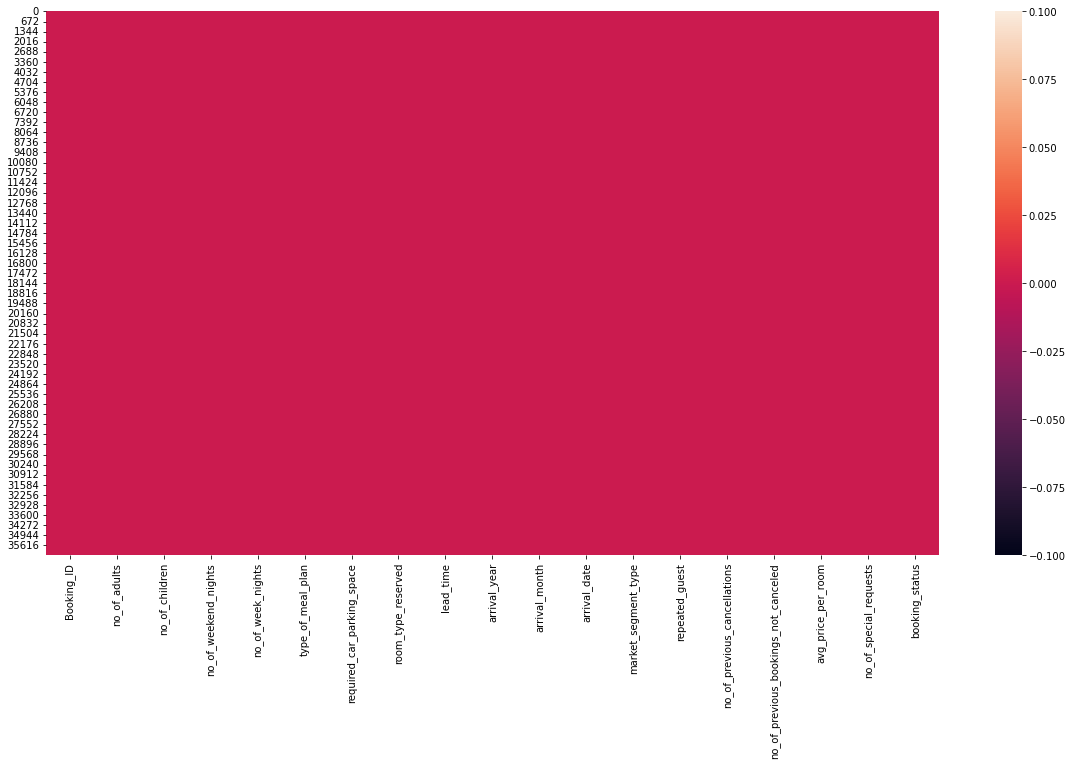

In [8]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset.isnull())

In [9]:
dataset.select_dtypes(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...,...
36270,INN36271,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled


In [10]:
dataset = dataset.drop(columns = ['Booking_ID','room_type_reserved'])

In [11]:
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [12]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [13]:
dataset

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,65.00,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,106.68,1,0,0,1,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,60.00,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,100.00,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,94.50,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,167.80,1,0,0,0,0,0,0,1,1
36271,2,0,1,3,0,228,2018,10,17,0,...,90.95,2,0,0,0,0,0,0,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,98.39,2,0,0,0,0,0,0,1,1
36273,2,0,0,3,0,63,2018,4,21,0,...,94.50,0,0,0,1,0,0,0,1,0


<AxesSubplot:xlabel='booking_status_Not_Canceled', ylabel='count'>

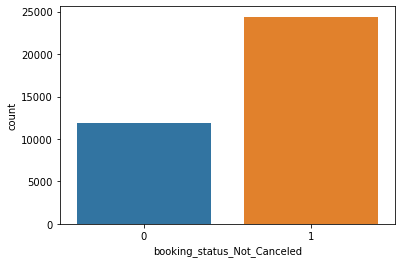

In [14]:
sns.countplot(dataset['booking_status_Not_Canceled'])

<AxesSubplot:xlabel='arrival_date', ylabel='Count'>

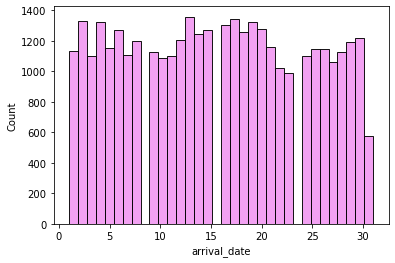

In [15]:
sns.histplot(dataset['arrival_date'], color = 'violet')

In [16]:
dataset_2 = dataset.drop(columns = 'booking_status_Not_Canceled')

<AxesSubplot:title={'center':'correlation'}>

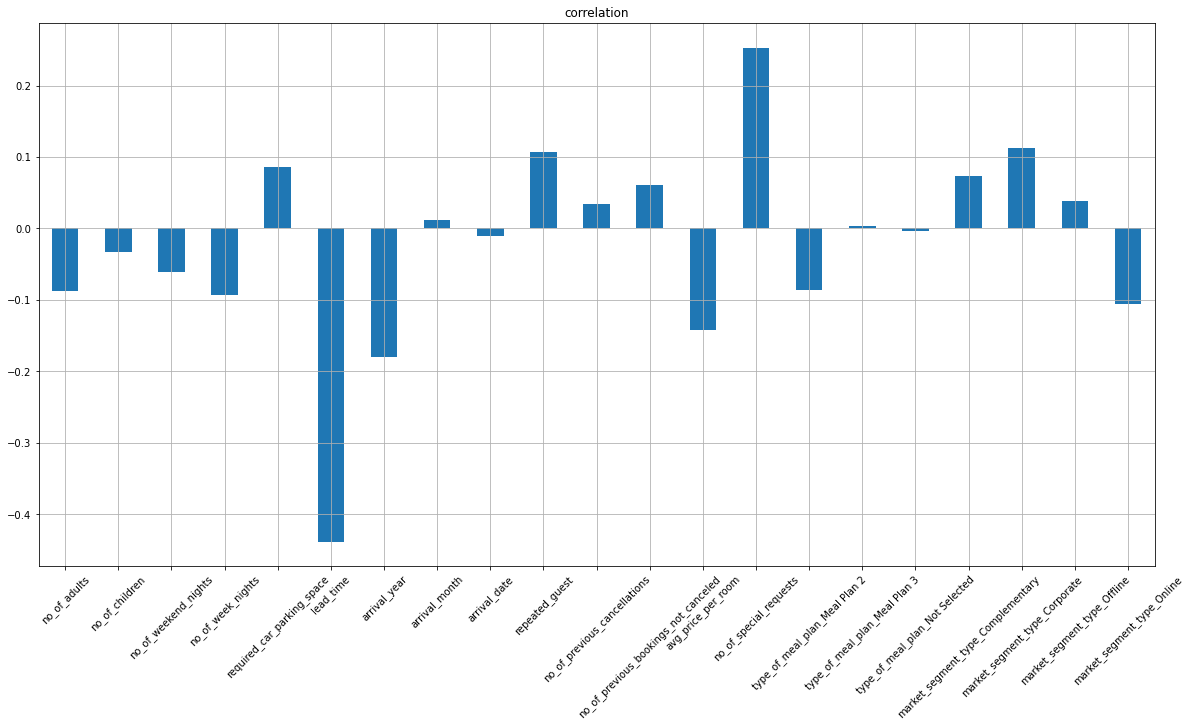

In [17]:
dataset_2.corrwith(dataset['booking_status_Not_Canceled']).plot.bar(figsize = (20,10), title = 'correlation', rot = 45,
                                                                   grid = True)

<AxesSubplot:>

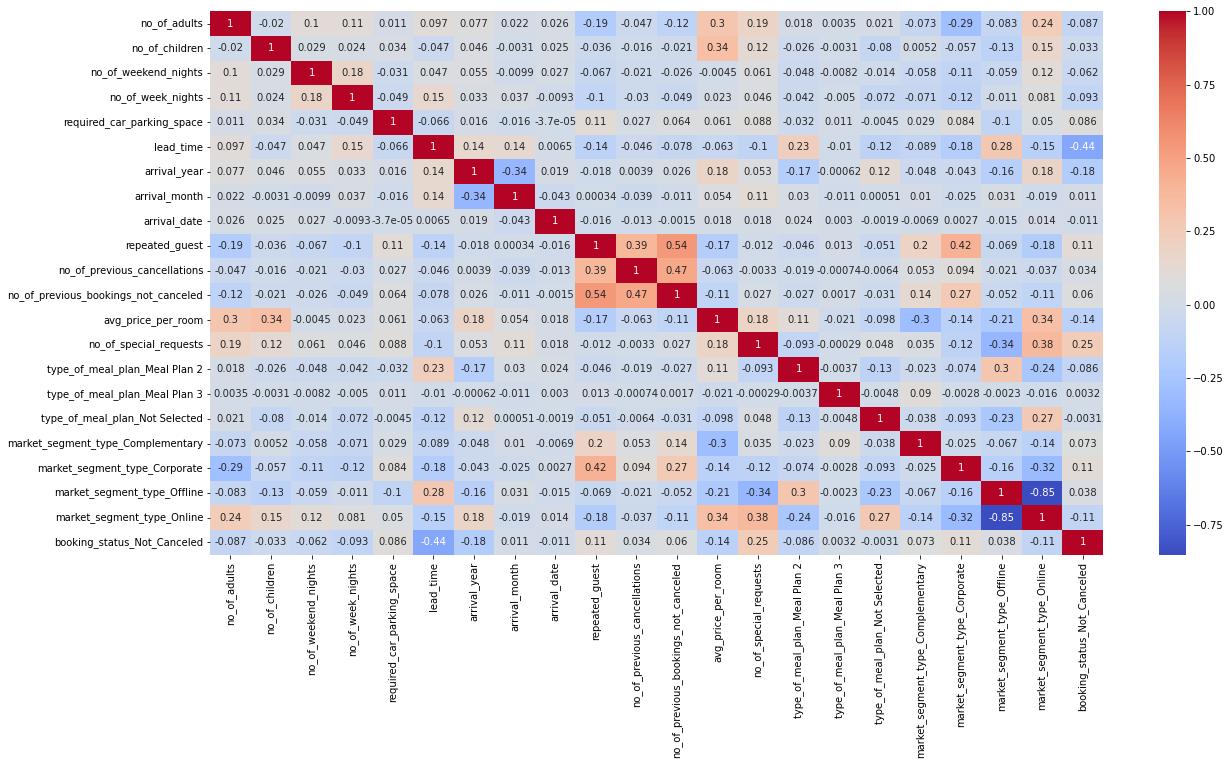

In [18]:
corr = dataset.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True, cmap ='coolwarm')

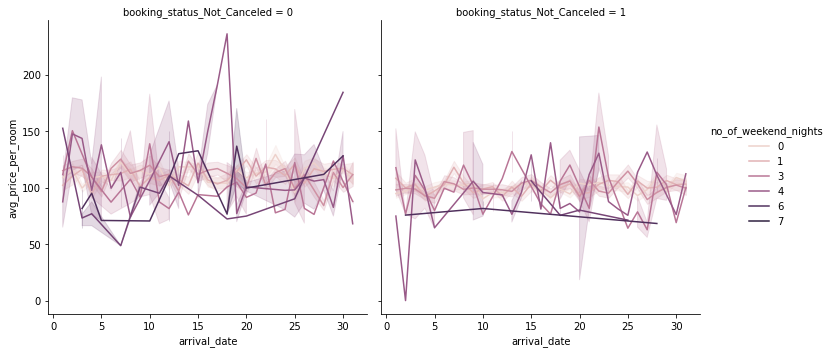

In [19]:
sns.relplot(data = dataset, x = 'arrival_date', y = 'avg_price_per_room', hue = 'no_of_weekend_nights' 
           , col = 'booking_status_Not_Canceled',kind="line")

In [20]:
x= dataset.drop(columns = 'booking_status_Not_Canceled')
y =dataset['booking_status_Not_Canceled']

In [21]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,65.00,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,106.68,1,0,0,1,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,60.00,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,100.00,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,94.50,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,167.80,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,90.95,2,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,98.39,2,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,94.50,0,0,0,1,0,0,0,1


In [22]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_Not_Canceled, Length: 36275, dtype: uint8

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

In [24]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
34691,3,0,0,2,0,37,2018,10,5,0,...,0,158.40,2,0,0,0,0,0,0,1
8242,2,0,1,5,0,6,2018,12,27,0,...,0,70.00,1,0,0,0,0,0,1,0
34412,2,2,0,1,0,13,2017,8,27,0,...,0,153.00,2,0,0,0,0,0,0,1
23636,2,0,0,3,0,17,2017,10,15,0,...,0,104.11,1,0,0,0,0,0,0,1
24498,2,0,0,3,0,72,2018,6,1,0,...,0,108.11,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1,0,2,5,0,34,2018,11,14,0,...,0,74.80,2,0,0,0,0,0,0,1
32103,2,0,0,2,0,346,2018,9,13,0,...,0,115.00,1,1,0,0,0,0,1,0
30403,3,0,0,4,0,175,2018,8,2,0,...,0,130.05,1,0,0,0,0,0,0,1
21243,1,0,0,3,0,5,2017,12,1,0,...,0,64.80,0,0,0,0,0,0,1,0


In [25]:
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16432,3,0,2,3,0,22,2018,4,14,0,...,0,152.60,2,0,0,0,0,0,0,1
15128,2,0,0,3,0,193,2017,10,15,0,...,0,65.00,0,0,0,0,0,0,1,0
16842,2,0,0,2,0,257,2017,7,1,0,...,0,101.50,0,1,0,0,0,0,1,0
5488,2,0,2,4,0,7,2018,6,16,0,...,0,156.00,1,0,0,0,0,0,0,1
31896,2,0,0,2,0,39,2017,8,14,0,...,0,101.50,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18705,2,0,0,3,0,22,2018,12,8,0,...,0,0.00,2,0,0,0,1,0,0,0
7796,2,0,0,2,0,63,2017,9,4,0,...,0,116.00,0,1,0,0,0,0,1,0
8282,2,0,1,0,0,18,2018,12,11,0,...,0,80.00,0,0,0,0,0,0,1,0
34139,2,0,2,3,0,82,2018,3,27,0,...,0,84.15,1,0,0,0,0,0,0,1


In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
y_pred = xgb.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,XGBoost,0.892824,0.921973,0.903672,0.94103


In [29]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(xgb, X =x_train, y= y_train, cv = 10)

In [30]:
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))

Accuracy is 89.02246023161057%
Standard Deviation is 0.5577392225507851%


In [31]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
parameters = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
random_search = RandomizedSearchCV(estimator = xgb, param_distributions = parameters , n_iter = 10,
                                 n_jobs = -1, scoring =  'roc_auc', cv = 10, verbose =3)

In [32]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200

In [33]:
random_search.best_score_

0.9508567625990004

In [34]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=1.6, ...)

In [35]:
from xgboost import XGBClassifier
final_model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=0, monotone_constraints='()', n_estimators=130,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0)
final_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=0, monotone_constraints='()', n_estimators=130, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0, ...)

In [36]:
y_pred = final_model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
final_results = pd.DataFrame([['Final Model', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
final = final_results.append(results)
final

,Model,Accuracy Score,F1 score,Precision,Recall
0,Final Model,0.893576,0.922232,0.907169,0.937803
0,XGBoost,0.892824,0.921973,0.903672,0.941030


In [38]:
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(final_model, X =x_train, y= y_train, cv = 10)
print('Accuracy is {:2}%'.format(accuracies.mean()*100))
print('Standard Deviation is {:2}%'.format(accuracies.std()*100))


Accuracy is 89.43385251881985%
Standard Deviation is 0.46512210927174524%
